<h1><font color = "blue">Simulated annealing </font></h1>

1) Choose a random Xi, select the initial system temperature, and specify the cooling (i.e. annealing) schedule <br>
2) Evaluate E(Xi) using a simulation model <br>
3) Perturb Xi to obtain a neighboring Design Vector (Xi+1) <br>
4) Evaluate E(Xi+1) using a simulation model <br>
5) If E(Xi+1)< E(Xi), Xi+1 is the new current solution <br>
6) If E(Xi+1)> E(Xi), then accept Xi+1 as the new current solution with a probability e(- /T) where = E(Xi+1) - E(Xi). <br>
7) Reduce the system temperature according to the cooling schedule. <br>
8) Terminate the algorithm.

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from math import exp

In [2]:
interval = (-500, 500)

def v(x): ##fitness function
    m = 1 + np.cos (0.04 * x)**2
    n = np.exp(-x**2 / 20000)
    return m * n

def f(x):
    return -v(x)

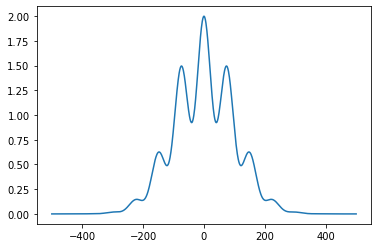

In [3]:
x = np.linspace(-500,500,1000)
plt.plot(x, v(x))
plt.show()

In [4]:
def move_(fraction=1):
    """Move a little bit x, from the left or the right."""
    amplitude = (max(interval) - min(interval)) * fraction / 10
    delta = (-amplitude/2.) + amplitude * random.random()
    return delta


def simulated_annealing(max_it,init_temp, alpha, final_temp, initial_state, debug=False):
    perturbation = 0
    #The initial configuration
    current_state = initial_state
    #The energy at the initial configuration
    states = [current_state]
    costs = [f(current_state)]
    iterations = [1]
    t = init_temp
    while (t > final_temp):
        for i in range(1, max_it):
            #Perturb the configuration and evaluate the difference in terms of energy
            perturbation = move_()
            next_state = current_state + perturbation
            energy_delta = f(next_state) - f(current_state)
            if (debug == True):
                print("Step #: " + str(i) + ", Temp = " +str(t)+ " Energy = "+ str(f(current_state)) + " New Energy = " + str(f(next_state))+" delta = " + str(energy_delta))
            if ((energy_delta < 0) or (math.exp(-energy_delta/t))>= random.random()):
                #accept the new configuration
                current_state = next_state
            states.append(current_state)
            costs.append(v(current_state))
            iterations.append(len(iterations))
        t = alpha*t
        plt.plot(x, v(x), color="black")
        plt.scatter(states,costs)
    return current_state 



best fit of the algorithm: 0.3174893106315615
cost function at best fit : 1.9998286504223108


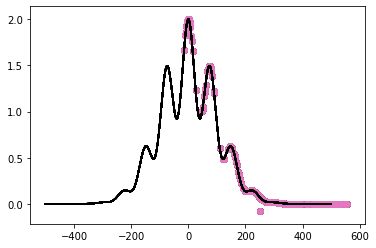

In [5]:
initial_config = 250
res = simulated_annealing(max_it=10,init_temp=10,alpha=.85,final_temp=.001,initial_state=initial_config)
print ("best fit of the algorithm:", 
       res)
print ("cost function at best fit :", v(res))